In [1]:
import tensorflow

In [2]:
import gym
import json
import datetime as dt

from stable_baselines3.ddpg.policies import MlpPolicy
from stable_baselines3.common.noise import OrnsteinUhlenbeckActionNoise
from stable_baselines3 import DDPG, A2C
from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3.common.vec_env import SubprocVecEnv
from stable_baselines3.common.utils import set_random_seed

from env.SoccerActionsEnv import SoccerActionsEnv

import pandas as pd
import numpy as np

import lib.draw as draw
import matplotlib.pyplot as plt
from tqdm import tqdm
import time

In [3]:
env = SoccerActionsEnv(randomized_start=True, end_on_xg=True, deterministic=True)

C:\Users\Tiago Mendes-Neves\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:315: UserWarning: Trying to unpickle estimator LabelBinarizer from version 0.23.2 when using version 0.24.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\Tiago Mendes-Neves\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:315: UserWarning: Trying to unpickle estimator MLPClassifier from version 0.23.2 when using version 0.24.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [4]:
model = DDPG.load('saved_models/ddpg_soccer_actions_env_2_BIG2')

In [5]:
saving_rewards = []
saving_rewards2 = []
saving_action_count = []
obs = env.reset()
count = 0
for i in tqdm(range(10000)):
  count += 1
  action, _states = model.predict(obs)
  obs, rewards, done, info = env.step(action)
  if done:
      saving_rewards.append(info['expectedGoals'])
      saving_action_count.append(count)
      count = 0
      env.reset()
np.mean(saving_rewards), np.mean(saving_action_count)


0.0 0.2647327524616371 0.5995506984188209 0.33481795 0.0
0.0 0.0017921370460639574 0.2647327524616371 0.26294062 0.0
0.0 0.46817017929338456 0.8094021214702034 0.34123194 0.0
0.0 0.16670889990114213 0.46817017929338456 0.30146128 0.0
0.0 0.4184402384420516 0.7110462941785933 0.29260606 0.0
0.0 0.17017568727933186 0.4184402384420516 0.24826455 0.0
0.0 0.09816134112941932 0.3338830782757969 0.23572174 0.0
0.0 0.17923903775535044 0.6299630434545082 0.450724 0.0
0.0 0.17948836107896016 0.4865357281749074 0.30704737 0.0
0.0 0.5482404622199883 0.708787354379472 0.37522984 0.8203667
0.0 0.055740134155672916 0.5482404622199883 0.5006882 0.9711776
0.0 0.5736175444256638 0.852922585261998 0.27930504 0.0
0.0 0.08429559259278374 0.5736175444256638 0.5008129 0.9658407
0.0 0.45786328223325223 0.8282844236192843 0.37042114 0.0
0.0 0.21354461815930814 0.45786328223325223 0.24431866 0.0
0.0 0.16525434836309696 0.21354461815930814 0.20923775 0.78706574
0.0 0.5572496700118534 0.9355087625812046 0.378259

(4.54080589077521e-06, 2.0449989772959705)

In [6]:
scouter_array = np.array([[i, j] for i in np.arange(0,1,0.01) for j in np.arange(0,1,0.0177)])
decisions = []
for array in tqdm(scouter_array):
    action, _ = model.predict(array)
    decisions.append(action)
scouter = pd.DataFrame(scouter_array * 100, columns=['x','y'])
scouter[['action','r','a']] = decisions

100%|██████████| 5700/5700 [00:02<00:00, 2043.41it/s]


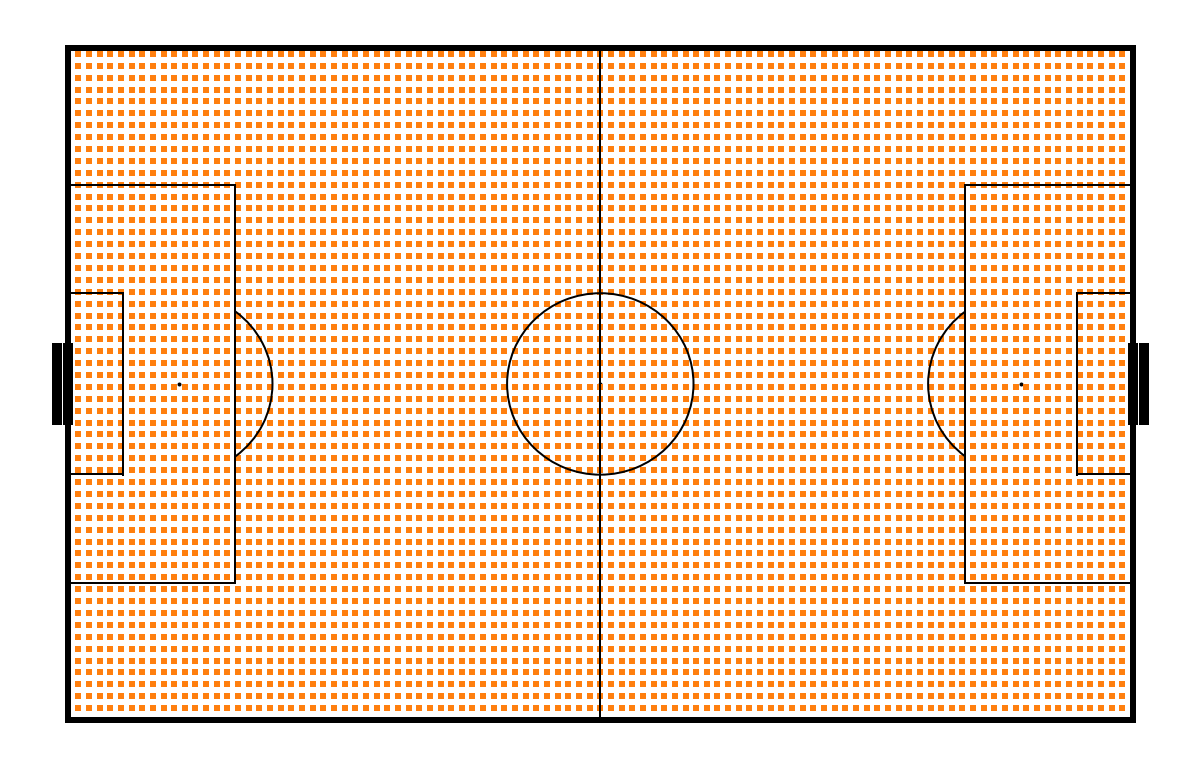

In [7]:
draw.pitch()
scouter_shots = scouter[scouter.action < 0.5]
scouter_passes = scouter[scouter.action >= 0.5]
plt.scatter(scouter_shots.x, scouter_shots.y, s = 10, c = 'C0', marker = 's', linewidth=0);
plt.scatter(scouter_passes.x, scouter_passes.y, s = 10, c = 'C1', marker = 's', linewidth=0);

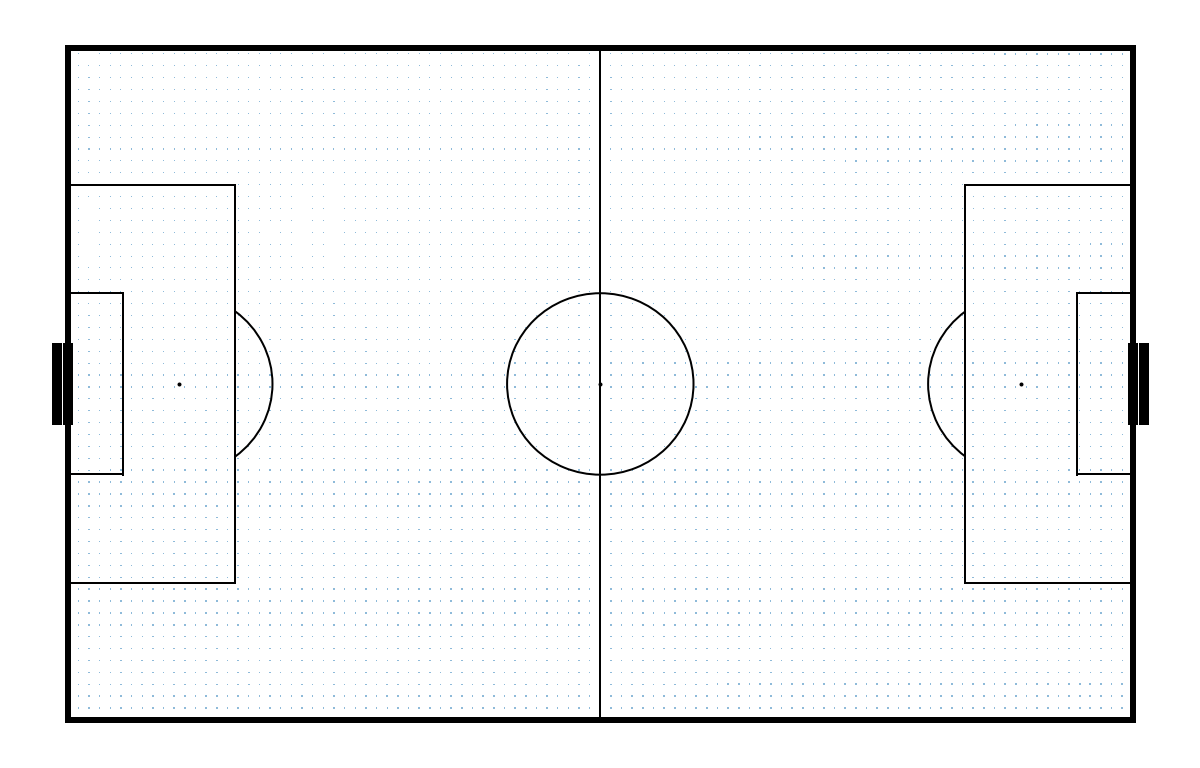

In [8]:
draw.pitch()
plt.scatter(scouter.x, scouter.y, s = scouter.r, c = 'C0', alpha = 0.5, marker = 's', linewidth=0);

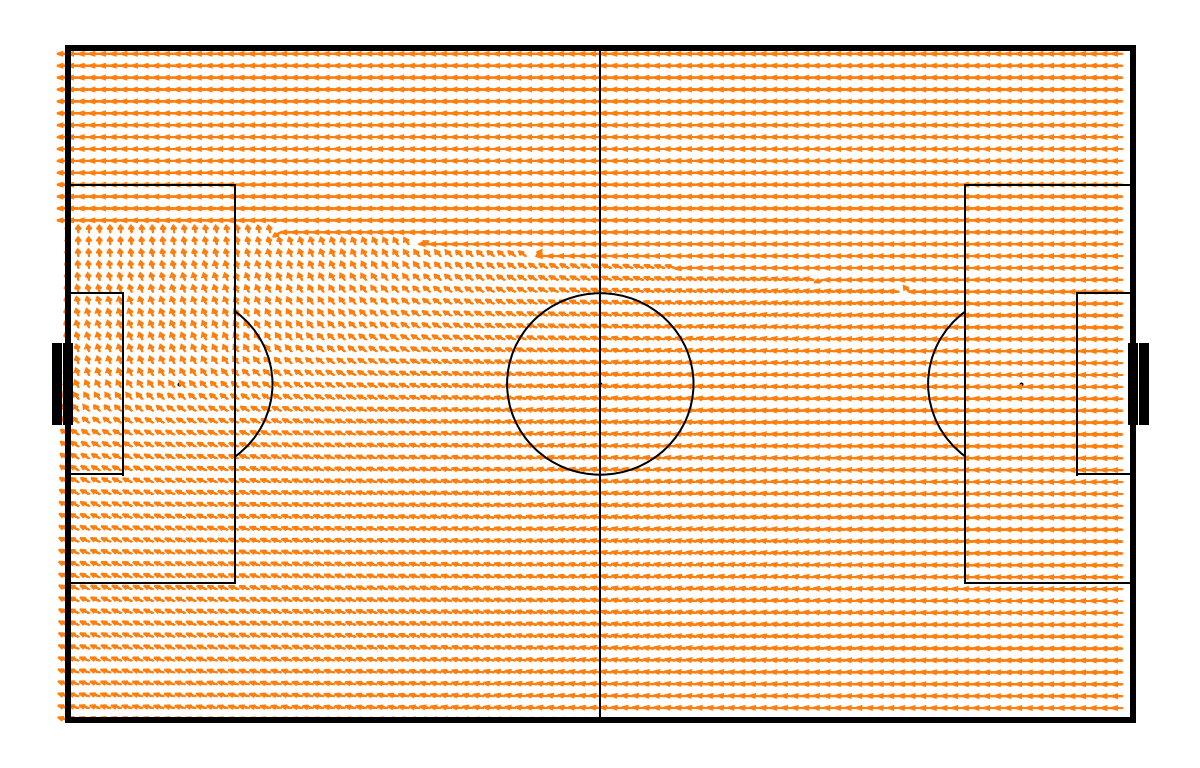

In [9]:
draw.pitch()
for i, row in scouter_passes.iterrows():
    plt.arrow(row['x'], row['y'], row.r/abs(row.r) * np.cos((row.a - 0.5) * 2 * np.pi), row.r/abs(row.r) * np.sin((row.a - 0.5) * 2 * np.pi), length_includes_head = True, head_width = .5, head_length = .5, color = 'C1')

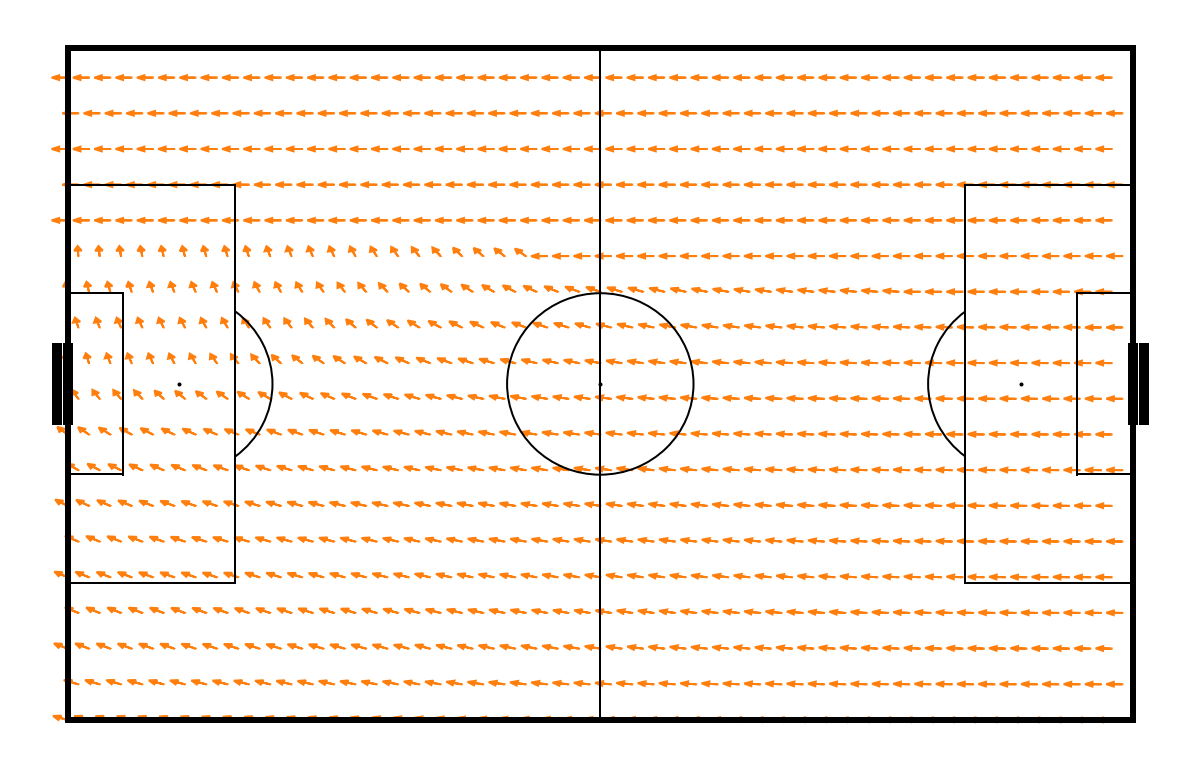

In [10]:
draw.pitch()
scouter_shots = scouter[scouter.action < 0.5]
scouter_passes = scouter[scouter.action >= 0.5]
plt.scatter(scouter_shots.x, scouter_shots.y, s = 10, c = 'C0', marker = 's', linewidth=0);
for i, row in scouter_passes.iterrows():
    if i%6 == 0:
        plt.arrow(row['x'], row['y'], 1.5*row.r/abs(row.r) * np.cos((row.a - 0.5) * 2 * np.pi), 1.5*row.r/abs(row.r) * np.sin((row.a - 0.5) * 2 * np.pi), length_includes_head = True, head_width = .7, head_length = .7, color = 'C1')